In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# 공압
df['MAIN_AIR_PRESS'].value_counts()

MAIN_AIR_PRESS
2609.00    1150
2608.00    1126
2610.00    1107
2606.00    1083
2607.00    1073
           ... 
2588.82       1
2581.53       1
2585.26       1
2592.68       1
2594.02       1
Name: count, Length: 7662, dtype: int64

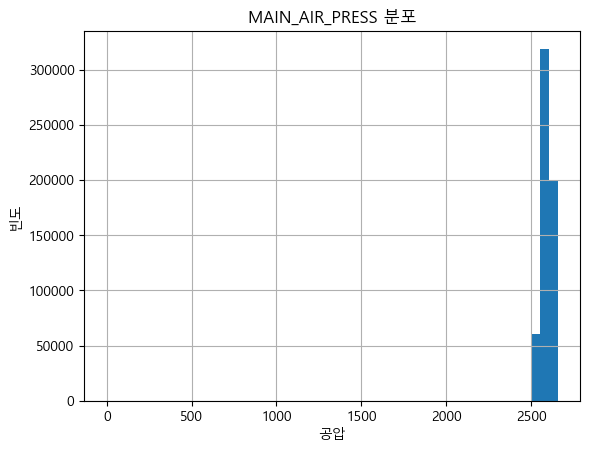

In [ ]:
plt.hist(df['MAIN_AIR_PRESS'], bins=50)
plt.title("MAIN_AIR_PRESS 분포")
plt.xlabel("공압")
plt.ylabel("빈도")
plt.grid(True)
plt.show()

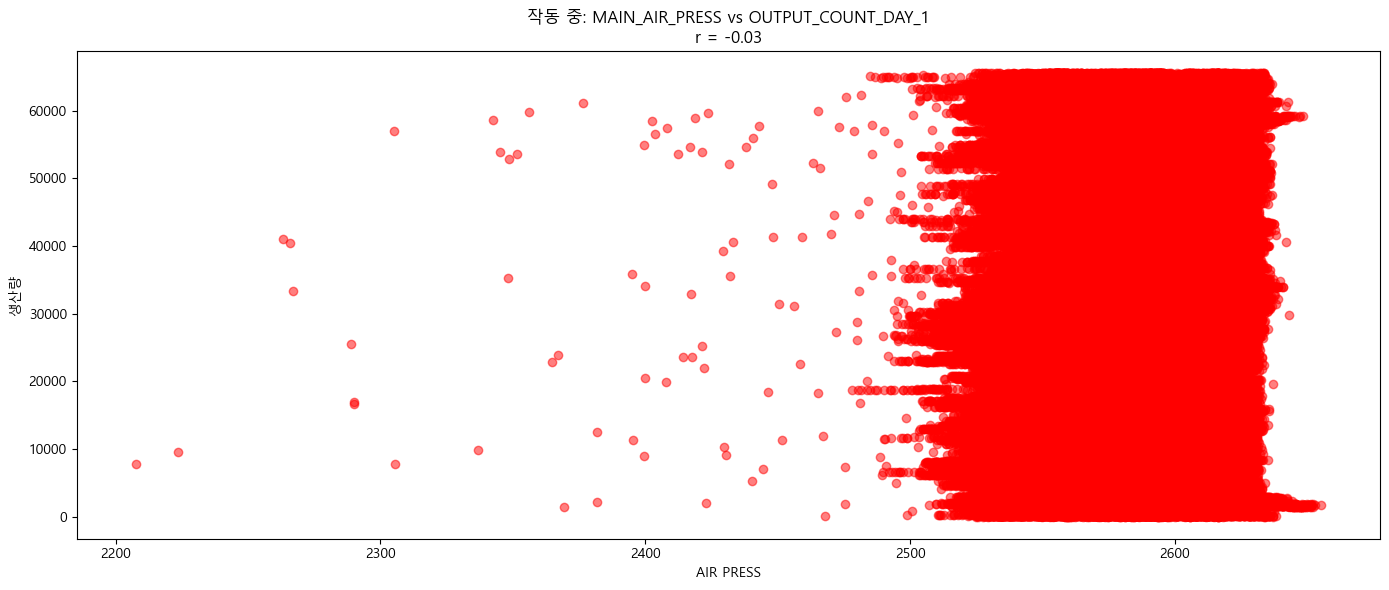

In [ ]:
# 작동 중 (STATUS == 2)인 구간만 필터링
active_df = df[df['STATUS'] == 2]

# 상관계수 계산
corr_control = active_df['MAIN_AIR_PRESS'].corr(active_df['OUTPUT_COUNT_DAY_1'])

# Control
plt.scatter(active_df['MAIN_AIR_PRESS'], active_df['OUTPUT_COUNT_DAY_1'], color='red', alpha=0.5)
plt.title(f'작동 중: MAIN_AIR_PRESS vs OUTPUT_COUNT_DAY_1\nr = {corr_control:.2f}')
plt.xlabel('AIR PRESS')
plt.ylabel('생산량')

plt.tight_layout()
plt.show()


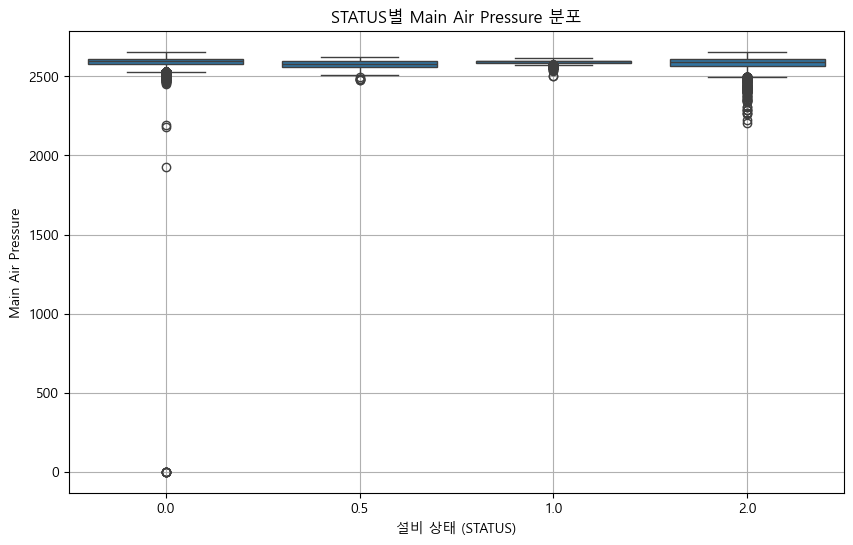

In [3]:
df_status_air = df[['STATUS', 'MAIN_AIR_PRESS']].dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='MAIN_AIR_PRESS', data=df_status_air)
plt.title('STATUS별 Main Air Pressure 분포')
plt.xlabel('설비 상태 (STATUS)')
plt.ylabel('Main Air Pressure')
plt.grid(True)
plt.show()

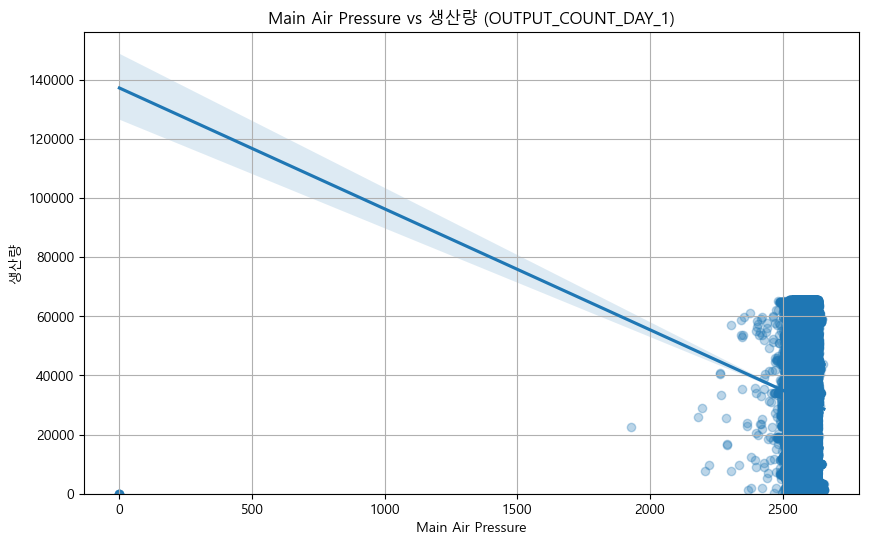

상관계수 (Pearson r): -0.061 (p-value: 0)


In [5]:
from scipy.stats import pearsonr

df_prod_air = df[['MAIN_AIR_PRESS', 'OUTPUT_COUNT_DAY_1']].dropna()

# 산점도 및 회귀선
plt.figure(figsize=(10, 6))
sns.regplot(
    x='MAIN_AIR_PRESS',
    y='OUTPUT_COUNT_DAY_1',
    data=df_prod_air,
    scatter_kws={'alpha': 0.3}
)
plt.title('Main Air Pressure vs 생산량 (OUTPUT_COUNT_DAY_1)')
plt.xlabel('Main Air Pressure')
plt.ylabel('생산량')

plt.ylim(bottom=0)

plt.grid(True)
plt.show()

# 상관계수 계산
corr, pval = pearsonr(df_prod_air['MAIN_AIR_PRESS'], df_prod_air['OUTPUT_COUNT_DAY_1'])
print(f'상관계수 (Pearson r): {corr:.3f} (p-value: {pval:.3g})')

In [6]:
# 하나의 사이클로 데이터 보기
df1 = pd.read_csv('df_cycle1.csv')

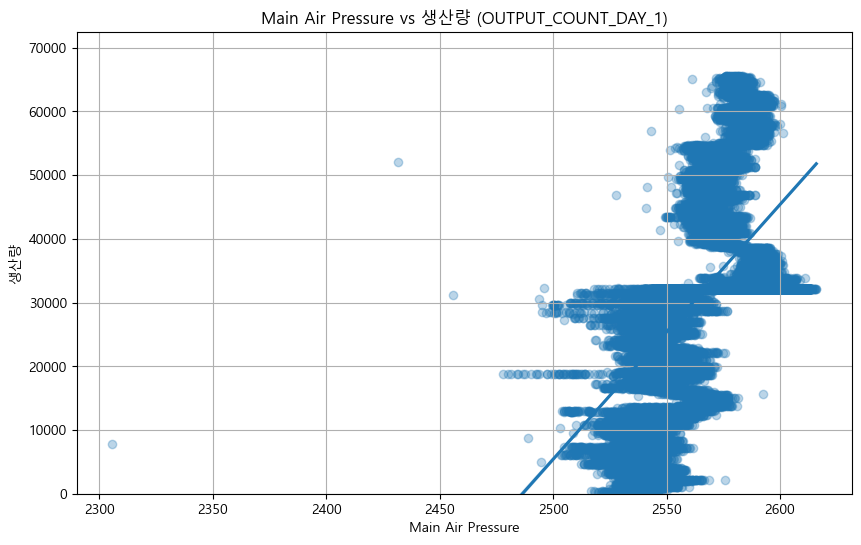

상관계수 (Pearson r): 0.569 (p-value: 0)


In [7]:
from scipy.stats import pearsonr

df_prod_air = df1[['MAIN_AIR_PRESS', 'OUTPUT_COUNT_DAY_1']].dropna()

# 산점도 및 회귀선
plt.figure(figsize=(10, 6))
sns.regplot(
    x='MAIN_AIR_PRESS',
    y='OUTPUT_COUNT_DAY_1',
    data=df_prod_air,
    scatter_kws={'alpha': 0.3}
)
plt.title('Main Air Pressure vs 생산량 (OUTPUT_COUNT_DAY_1)')
plt.xlabel('Main Air Pressure')
plt.ylabel('생산량')

plt.ylim(bottom=0)

plt.grid(True)
plt.show()

# 상관계수 계산
corr, pval = pearsonr(df_prod_air['MAIN_AIR_PRESS'], df_prod_air['OUTPUT_COUNT_DAY_1'])
print(f'상관계수 (Pearson r): {corr:.3f} (p-value: {pval:.3g})')

---
### 컬럼들 status별 평균 확인

In [10]:
df.columns

Index(['Timestamp', 'OUTPUT_COUNT_DAY_1', 'KO6_MOTOR_SET_FREQ',
       'CUTTING_SET_FREQ', 'STATUS', 'KO5_MOTOR_SET_FREQ',
       'METAL_OIL_SUPPLY_PRESS_CONTR', 'KO4_MOTOR_SET_FREQ',
       'KO2_MOTOR_SET_FREQ', 'MAIN_MOTOR_CURR', 'KO3_MOTOR_SET_FREQ',
       'TRANS_POS_UP_SET_H', 'TONGS_INVERTER_ALM_ERR_CD', 'KO1_MOTOR_SET_FREQ',
       'KO3_MOTOR_INVERTER_ALM', 'MAIN_MOTOR_RPM', 'TRANS_INVERTER_ALM_ERR_CD',
       'TONGS_CAST_SET_FREQ', 'TRANS_POS_LEFT_SET_H', 'KO4_MOTOR_INVERTER_ALM',
       'OIL_SUPPLY_PRESS', 'KO2_MOTOR_INVERTER_ALM', 'TRANS_POS_UP',
       'TONGS_POS', 'WORK_OIL_SUPPLY_PRESS', 'METAL_TEMP_CONTROL',
       'TONGS_CAST_CURR', 'CUTTING_INVERTER_ALM_ERR_CD',
       'KO6_MOTOR_INVERTER_ALM', 'TRANS_POS_RIGHT_SET_H', 'TRANS_POS_LEFT',
       'METAL_OIL_SUPPLY_PRESS_CUT', 'MAIN_AIR_PRESS', 'TRANS_SET_FREQ',
       'METAL_TEMP_CUT', 'KO5_MOTOR_INVERTER_ALM', 'MAIN_MOTOR_SET_FREQ',
       'KO1_MOTOR_INVERTER_ALM', 'TRANS_POS_DOWN_SET_H', 'OUTPUT_COUNT_DAY_2',
       'OUT

In [9]:
cols = df.columns.tolist()
df_mean = df.groupby('STATUS')[df.select_dtypes(include='number').columns].mean()

In [10]:
df_mean.to_csv('df_mean.csv', index=False)

In [23]:
df.groupby("STATUS")[[
       'TONGS_INVERTER_ALM_ERR_CD',
       'TONGS_CAST_SET_FREQ',
       'TONGS_POS',
       'TONGS_CAST_CURR',
       'OUTPUT_COUNT_DAY_2',
       'OUTPUT_COUNT_SUM']].mean()

,TONGS_INVERTER_ALM_ERR_CD,TONGS_CAST_SET_FREQ,TONGS_POS,TONGS_CAST_CURR,OUTPUT_COUNT_DAY_2,OUTPUT_COUNT_SUM
STATUS,,,,,,
0.0,7404.364619,5790.792377,0.773696,19.384116,26544.697638,57722.973445
0.5,8995.000000,5993.028322,1.000000,2.022137,41662.930065,62003.584749
1.0,8995.000000,6000.000000,1.000000,0.000000,38783.015092,665.000000
2.0,7928.948031,5907.773648,0.881484,18.222760,32369.452016,55490.201863


In [21]:
df.groupby("STATUS")[[
        'MAIN_AIR_PRESS','OIL_SUPPLY_PRESS','WORK_OIL_SUPPLY_PRESS', 'TRANS_SET_FREQ','TRANS_INVERTER_ALM_ERR_CD']].mean()

,MAIN_AIR_PRESS,OIL_SUPPLY_PRESS,WORK_OIL_SUPPLY_PRESS,TRANS_SET_FREQ,TRANS_INVERTER_ALM_ERR_CD
STATUS,,,,,
0.0,2595.288999,463.695952,1638.297895,4938.986961,7404.364619
0.5,2579.346941,505.816620,1828.266489,6000.000000,8995.000000
1.0,2591.818260,467.378441,1868.081877,6000.000000,8995.000000
2.0,2585.533133,430.697364,1694.277523,5288.903634,7928.948031


In [20]:
# metal
df.groupby("STATUS")[['METAL_OIL_SUPPLY_PRESS_CONTR', 'METAL_OIL_SUPPLY_PRESS_CUT','METAL_TEMP_CONTROL','METAL_TEMP_CUT',]].mean()

,METAL_OIL_SUPPLY_PRESS_CONTR,METAL_OIL_SUPPLY_PRESS_CUT,METAL_TEMP_CONTROL,METAL_TEMP_CUT
STATUS,,,,
0.0,317.346411,300.758232,35.875697,35.465211
0.5,344.404228,326.182378,36.813943,36.246623
1.0,317.570488,299.202071,41.495215,40.811043
2.0,260.503351,217.261720,37.808967,37.686997


In [18]:
# 컷팅
df.groupby("STATUS")[['CUTTING_SET_FREQ', 'CUTTING_INVERTER_ALM_ERR_CD', ]].mean()

,CUTTING_SET_FREQ,CUTTING_INVERTER_ALM_ERR_CD
STATUS,,
0.0,4938.986961,362.387377
0.5,6000.000000,1584.257516
1.0,6000.000000,1.000000
2.0,5288.903634,1025.097473


In [19]:
# 모터 종류
df.groupby("STATUS")[['KO1_MOTOR_SET_FREQ', 'KO1_MOTOR_INVERTER_ALM',
                      'MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM', 'MAIN_MOTOR_SET_FREQ', 'MAIN_MOTOR_ALM']].mean()

,KO1_MOTOR_SET_FREQ,KO1_MOTOR_INVERTER_ALM,MAIN_MOTOR_CURR,MAIN_MOTOR_RPM,MAIN_MOTOR_SET_FREQ,MAIN_MOTOR_ALM
STATUS,,,,,,
0.0,5116.128385,362.416901,3219.358820,9968.933405,3566.771750,103.315547
0.5,6000.000000,1584.257516,3941.521351,12979.196078,4333.000000,452.409586
1.0,6000.000000,1.000000,3880.665993,12999.000000,4333.000000,0.000000
2.0,5545.524664,1025.140243,4901.720177,12224.082535,3819.469908,292.665676
